## **Project -5 Image Classification from CIFAR-10 dataset **

### **Import Libraires**

In [0]:
import keras
from matplotlib import pyplot
from scipy.misc import toimage
from keras.datasets import cifar10
%matplotlib inline

### [**Download the cifar10 data into train and test**](https://)

In [0]:
def show_imgs(X):
    pyplot.figure(1)
    k = 0
    for i in range(0,4):
        for j in range(0,4):
            pyplot.subplot2grid((4,4),(i,j))
            pyplot.imshow(toimage(X[k]))
            k = k+1
    # show the plot
    pyplot.show()


In [5]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


170500096/170498071 [==============================] - 43s 0us/step


In [6]:
x_train.shape

(50000, 32, 32, 3)

### 50,000 images are there in the dataset with pixel size 32 * 32 and a colour image.

In [7]:
y_train.shape

(50000, 1)

In [8]:
x_test.shape

(10000, 32, 32, 3)

In [9]:
y_test.shape

(10000, 1)

### Display the first 16 impages

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  import sys


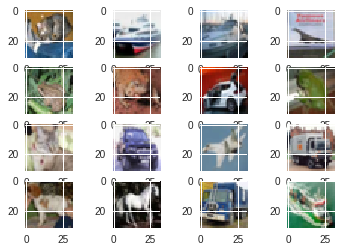

In [10]:
show_imgs(x_test[:16])

### To avoid overfitting,  Generate different images from a same image  by taking random crop of the same image by using Data generator function

In [0]:
# Data Augmentation
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator( rotation_range=90,
                 width_shift_range=0.1, height_shift_range=0.1,
                 horizontal_flip=True)
datagen.fit(x_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  import sys


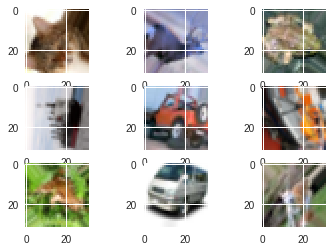

In [12]:
from matplotlib import pyplot as plt
# Configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9):
    # Show 9 images
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(toimage(X_batch[i]))
    # show the plot
    plt.show()
    break


### Import Packages

In [0]:
import keras
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras import regularizers
from keras.callbacks import LearningRateScheduler
import numpy as np

###   Define Learning Rate Scheduler - based on the epochs. 

In [0]:
def lr_schedule(epoch):
    lrate = 0.001  # Learning rate is higher at the start
    if epoch > 75:
        lrate = 0.0005 # smaller Learning rate as we are reaching global minimum
    if epoch > 100:
        lrate = 0.0003 # smaller Learning rate as we are reaching global minimum
    return lrate


### As the images are in pixles value which are integer. We will scale the data between 0 and 1. so converting it to float

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

## #Get mean and standard deviation values 

In [0]:
mean = np.mean(x_train,axis=(0,1,2,3))
std = np.std(x_train,axis=(0,1,2,3))

In [17]:
mean

120.70748

In [18]:
std

64.150024

### Normalize the data

In [0]:
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)

In [0]:
# Class number
num_classes = 10

In [21]:
y_train[:10] # This represent the class number. Like 1- Automobiles, 9 - Truck etc. Need to convert one hot encoding

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [0]:
# To convert y_train and y_test to one hot vectors.
y_train = np_utils.to_categorical(y_train,num_classes)
y_test = np_utils.to_categorical(y_test,num_classes)

In [24]:
y_train[:10]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

## Define the Model

In [25]:
weight_decay = 1e-4

model = Sequential()  # This is a sequential model not a recurrent model
#Convolution with 3*3 filter. 
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=x_train.shape[1:]))
model.add(Activation('elu')) # elu activation
model.add(BatchNormalization())
# output of the first layer will be the input of the second layer
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2))) # 
model.add(Dropout(0.2)) # to avoid overfitting,adding a drop out of 20% of data to zero while training

model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())  # to put into a single array
model.add(Dense(num_classes, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [50]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
__________

In [0]:
#data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen.fit(x_train)

In [0]:
#training batch size
batch_size = 64

In [0]:
# Rs optimizer is a form of  Gradient descent and giving a small decay so that LR value is small
opt_rms = keras.optimizers.rmsprop(lr=0.001,decay=1e-6)

In [0]:
# Loss function -- Cross Entropy and monitor the accuracy. Optimizer is required to update the weights
model.compile(loss='categorical_crossentropy', optimizer=opt_rms, metrics=['accuracy'])

In [32]:
x_train.shape

(50000, 32, 32, 3)

In [33]:
y_train.shape

(50000, 10)

In [35]:
x_test.shape

(10000, 32, 32, 3)

In [36]:
y_test.shape

(10000, 10)

## Train the Model 

In [40]:
model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),\
                    steps_per_epoch=x_train.shape[0] // batch_size,epochs=30,\
                    verbose=1,validation_data=(x_test,y_test),callbacks=[LearningRateScheduler(lr_schedule)])

Epoch 1/30
781/781 [==============================] - 44s 56ms/step - loss: 1.2699 - acc: 0.5962 - val_loss: 1.0908 - val_acc: 0.6606
Epoch 2/30
781/781 [==============================] - 42s 54ms/step - loss: 1.0862 - acc: 0.6551 - val_loss: 0.9048 - val_acc: 0.7167
Epoch 3/30
781/781 [==============================] - 41s 52ms/step - loss: 0.9906 - acc: 0.6888 - val_loss: 0.8916 - val_acc: 0.7265
Epoch 4/30
781/781 [==============================] - 39s 50ms/step - loss: 0.9209 - acc: 0.7149 - val_loss: 0.8265 - val_acc: 0.7564
Epoch 5/30
781/781 [==============================] - 38s 49ms/step - loss: 0.8818 - acc: 0.7289 - val_loss: 0.8180 - val_acc: 0.7594
Epoch 6/30
781/781 [==============================] - 38s 49ms/step - loss: 0.8427 - acc: 0.7463 - val_loss: 0.8029 - val_acc: 0.7689
Epoch 7/30
781/781 [==============================] - 42s 54ms/step - loss: 0.8133 - acc: 0.7566 - val_loss: 0.7378 - val_acc: 0.7854
Epoch 8/30
781/781 [==============================] - 41s 53ms

### By the time it is 30 epocs, getting training validation accuracy to 85%

### Save the Model

In [0]:
#save to disk
model_json = model.to_json()
with open('model.json', 'w') as json_file:
    json_file.write(model_json)
model.save_weights('model.h5')

## #Test data validation with 128 batch size.

In [45]:
 
scores = model.evaluate(x_test, y_test, batch_size=128, verbose=1)

10000/10000 [==============================] - 2s 155us/step


In [48]:
#Printing the scores and the loss
print("\nTest result: %.3f loss: %.3f" % (scores[1]*100, scores[0]))


Test result: 85.120 loss: 0.592
